Nama : Annisa Miranda <br>
NIM : 1301184378 <br>
Kelas : IF 41-GAB01 <br>

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
idn = gpd.read_file("idn_admbnda_adm1_bps_20200401.shp")
idn.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."


In [3]:
covid = pd.read_csv("Indonesia_coronavirus_daily_data.csv")
covid.head()

,Date,Province_name,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,1/3/2020,Dki Jakarta,DKI Jakarta,2,0,0,2,2,0,0,2
1,2/3/2020,Dki Jakarta,DKI Jakarta,2,0,0,2,4,0,0,4
2,3/3/2020,Dki Jakarta,DKI Jakarta,2,0,0,2,6,0,0,6
3,4/3/2020,Dki Jakarta,DKI Jakarta,2,0,0,2,8,0,0,8
4,5/3/2020,Dki Jakarta,DKI Jakarta,0,1,0,-1,8,0,1,7


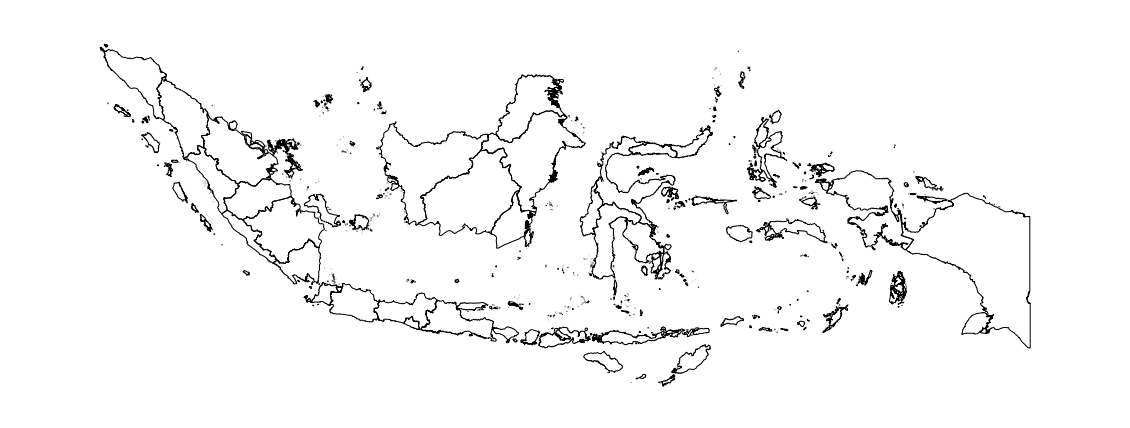

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 15))
gplt.polyplot(idn, ax=ax)

In [6]:
covid_case = covid["Date"]=="1/5/2021"
covid_case.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [8]:
combi = idn.merge(covid[covid_case], left_on="ADM1_EN", right_on="Province_name")
combi.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Date,Province_name,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0...",1/5/2021,Aceh,ACEH,124,2,119,3,11169,9732,442,995
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ...",1/5/2021,Bali,BALI,142,11,160,-29,44810,41887,1225,1698
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",1/5/2021,Banten,BANTEN,53,0,28,25,47396,44129,1205,2062
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ...",1/5/2021,Bengkulu,BENGKULU,102,0,40,62,6884,5892,172,820
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ...",1/5/2021,Daerah Istimewa Yogyakarta,DAERAH ISTIMEWA YOGYAKARTA,128,4,330,-206,39644,34737,960,3947


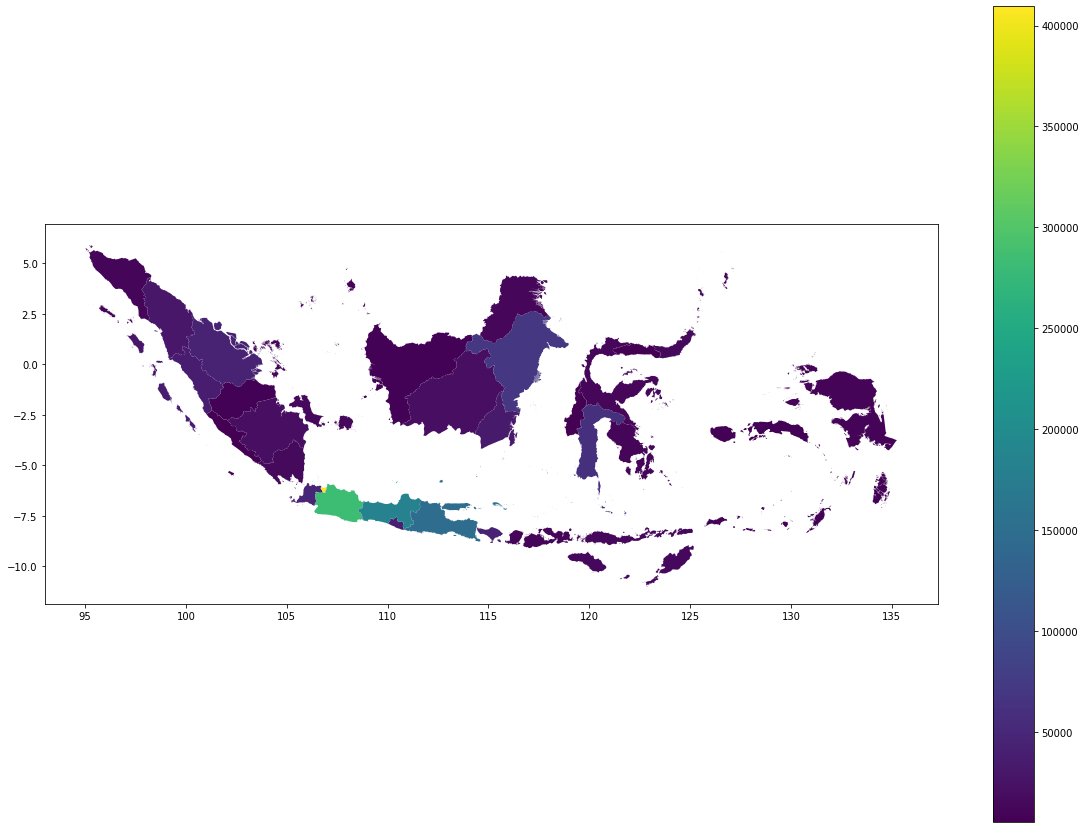

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 15))
combi.plot(column='Cumulative_Case', ax=ax, legend=True)